# Python for Finance: Portfolio optimization

In [1]:
# import necessary Python libraries
#
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import os, sys

plt.style.use('fivethirtyeight')

In [2]:
new_york = [
    'ABBV', 'ACN', 'AVGO', 'BAC', 'BUD', 'C', 'CAT', 'CMCSA', 'CRM', 'CVX', 'DIS', 'DHR',
    'FB', 'GE', 'GM', 'GOOG', 'GS', 'HD', 'HSBC', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'LLY',
    'MA', 'MCD', 'MMM', 'MRK', 'MSFT', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PFE', 'PG', 'PYPL', 'QCOM',
    'RY', 'SAP', 'SHOP', 'TRV', 'TSM', 'TXN', 'UNH', 'UPS', 'V', 'VZ', 'WFC', 'WMT', 'XOM'
]

bangkok = [
    'ADVANC.BK', 'AOT.BK', 'AMATA.BK', 'BANPU.BK', 'BAY.BK', 'BBL.BK', 'CENTEL.BK', 'CK.BK', 
    'CPALL.BK', 'CPF.BK', 'CPN.BK', 'DTAC.BK', 'EGCO.BK', 'INTUCH.BK', 'KBANK.BK', 'KCE.BK', 
    'KTB.BK', 'LH.BK', 'MINT.BK', 'PSL.BK', 'PTT.BK', 'PTTEP.BK', 'PTTGC.BK', 'QH.BK', 'SCC.BK'
]

In [3]:
#
# Parameter settings for this program!
#

RF = 0.01        # risk-free interest, for calculating Sharpe ratio
n_ports = 200    # number of trial (randomized) portfolio to be created
#tickers = ['INTC', 'KO', 'BAC', 'BUD', 'TSLA', 'AAPL', 'AMZN', 'GOOG', 'K', 'SJM', 'CPALL.BK', 'PTT.BK']
tickers = ['TSLA', 'AAPL', 'AMZN', 'GOOG', 'K', 'SJM', 'INTC', 'KO', 'BAC', 'BUD', ]

start = dt.datetime(2018, 1, 1)
end   = dt.datetime(2022, 6, 30)

In [4]:
# Download stock prices from Yahoo Finance using pandas_datareader library
#

# check if directory (or folder) not exist, then make that directory
folder = 'data'
if not os.path.isdir(folder):
    os.mkdir(folder)

# download and save price data of each stock into that directory
for nm in tickers:
    data = web.DataReader(nm, 'yahoo', start, end)
    filename = folder + '\\' + nm + '.csv'
    data.to_csv(filename)
    print('Downloading and saving', len(data), 'rows to', filename, flush=True)

In [5]:
# Read stock price returns data directly from csv files in data folder
#

# check if directory (or folder) exist?
folder = 'data'
if not os.path.isdir(folder):
    sys.exit("Folder 'data' does not exist for reading stock prices. Program terminately abnormally.")

returns = pd.DataFrame()

for ticker in tickers:
    filename = folder + '\\' + ticker + '.csv'
    data = pd.read_csv(filename, index_col='Date')
    data = pd.DataFrame(data)
    print('Reading', len(data), 'rows from', filename, flush=True)

    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:    # 1st time
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how='outer')

returns = returns.dropna()
returns

Reading 1258 rows from data\TSLA.csv
Reading 1258 rows from data\AAPL.csv
Reading 1258 rows from data\AMZN.csv
Reading 1258 rows from data\GOOG.csv
Reading 1258 rows from data\K.csv
Reading 1258 rows from data\SJM.csv
Reading 1215 rows from data\CPALL.BK.csv
Reading 1215 rows from data\PTT.BK.csv


,TSLA,AAPL,AMZN,GOOG,K,SJM,CPALL.BK,PTT.BK
Date,,,,,,,,
2017-01-05,-0.001057,0.005085,0.030732,0.009048,-0.000957,0.005057,-0.003846,0.018421
2017-01-06,0.009967,0.011149,0.019912,0.015277,0.000273,-0.001083,-0.015444,0.005168
2017-01-09,0.009912,0.009159,0.001168,0.000620,-0.013674,-0.007982,-0.027451,-0.015424
2017-01-10,-0.006096,0.001008,-0.001280,-0.002306,-0.006516,0.005703,0.000000,0.013055
2017-01-11,-0.000609,0.005373,0.003920,0.003877,0.002930,0.014836,-0.008064,-0.007732
...,...,...,...,...,...,...,...,...
2021-12-23,0.057619,0.003644,0.000184,0.001317,0.001434,-0.001127,0.004274,0.013333
2021-12-27,0.025248,0.022975,-0.008178,0.006263,0.006203,0.006467,-0.004292,-0.006579
2021-12-28,-0.005000,-0.005767,0.005844,-0.010914,0.010907,0.010086,0.008621,0.006622


In [6]:
returns.describe()

,TSLA,AAPL,AMZN,GOOG,K,SJM,CPALL.BK,PTT.BK
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,0.002648,0.001521,0.001502,0.001286,0.000068,0.000151,0.000076,0.000310
std,0.037886,0.019297,0.018566,0.017050,0.014920,0.015822,0.012707,0.018808
min,-0.210628,-0.128647,-0.079221,-0.111008,-0.109194,-0.095414,-0.079422,-0.253333
25%,-0.015471,-0.006503,-0.006839,-0.005757,-0.006723,-0.007384,-0.007149,-0.007320
50%,0.001535,0.001189,0.001452,0.001493,0.000510,0.000840,0.000000,0.000000
75%,0.019261,0.010942,0.010688,0.009314,0.006797,0.007997,0.006606,0.007143
max,0.198949,0.119808,0.132164,0.104485,0.106458,0.103769,0.070539,0.145631


## See corelation coefficient with heatmap

In [7]:
correlation = returns.corr()
correlation

,TSLA,AAPL,AMZN,GOOG,K,SJM,CPALL.BK,PTT.BK
TSLA,1.000000,0.398206,0.353293,0.350614,0.040557,0.053861,0.106719,0.148973
AAPL,0.398206,1.000000,0.640037,0.662079,0.220105,0.202763,0.109065,0.165171
AMZN,0.353293,0.640037,1.000000,0.662878,0.111829,0.073259,0.108593,0.123186
GOOG,0.350614,0.662079,0.662878,1.000000,0.179043,0.149020,0.089130,0.137077
K,0.040557,0.220105,0.111829,0.179043,1.000000,0.614902,0.009578,0.014870
SJM,0.053861,0.202763,0.073259,0.149020,0.614902,1.000000,0.023377,0.052623
CPALL.BK,0.106719,0.109065,0.108593,0.089130,0.009578,0.023377,1.000000,0.402212
PTT.BK,0.148973,0.165171,0.123186,0.137077,0.014870,0.052623,0.402212,1.000000


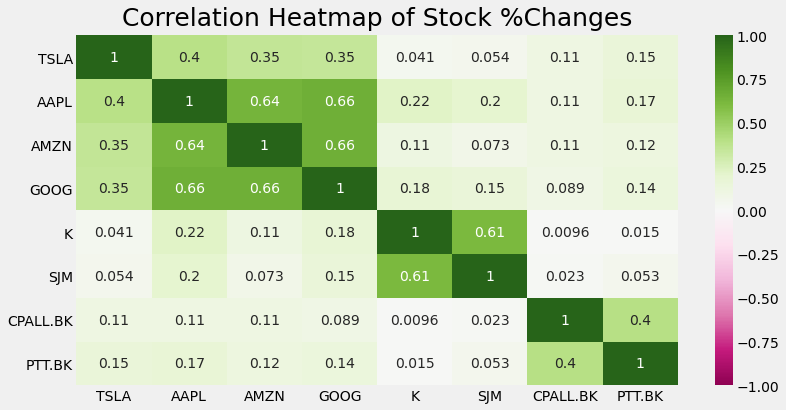

In [8]:
# plotting correlation heatmap

plt.figure(figsize = (12,6))
p = sb.heatmap(correlation, vmin=-1, vmax=1, cmap="PiYG", annot=True)
p.set_title('Correlation Heatmap of Stock %Changes', fontsize=25, pad=10)
plt.show()

In [9]:
df = returns.iloc[:5]
print(df)
df.cov()

                TSLA      AAPL      AMZN      GOOG         K       SJM  \
Date                                                                     
2017-01-05 -0.001057  0.005085  0.030732  0.009048 -0.000957  0.005057   
2017-01-06  0.009967  0.011149  0.019912  0.015277  0.000273 -0.001083   
2017-01-09  0.009912  0.009159  0.001168  0.000620 -0.013674 -0.007982   
2017-01-10 -0.006096  0.001008 -0.001280 -0.002306 -0.006516  0.005703   
2017-01-11 -0.000609  0.005373  0.003920  0.003877  0.002930  0.014836   

            CPALL.BK    PTT.BK  
Date                            
2017-01-05 -0.003846  0.018421  
2017-01-06 -0.015444  0.005168  
2017-01-09 -0.027451 -0.015424  
2017-01-10  0.000000  0.013055  
2017-01-11 -0.008064 -0.007732  


,TSLA,AAPL,AMZN,GOOG,K,SJM,CPALL.BK,PTT.BK
TSLA,0.000052,2.752755e-05,0.000013,0.000024,-1.259626e-05,-0.000045,-0.000071,-0.000057
AAPL,0.000028,1.550103e-05,0.000016,0.000018,-9.653618e-07,-0.000020,-0.000035,-0.000026
AMZN,0.000013,1.567516e-05,0.000192,0.000078,4.382604e-05,-0.000001,0.000027,0.000114
GOOG,0.000024,1.800094e-05,0.000078,0.000049,2.714503e-05,-0.000005,-0.000007,0.000026
K,-0.000013,-9.653618e-07,0.000044,0.000027,4.365683e-05,0.000042,0.000039,0.000034
SJM,-0.000045,-1.976386e-05,-0.000001,-0.000005,4.241293e-05,0.000072,0.000069,0.000031
CPALL.BK,-0.000071,-3.455352e-05,0.000027,-0.000007,3.862999e-05,0.000069,0.000118,0.000121
PTT.BK,-0.000057,-2.601969e-05,0.000114,0.000026,3.384546e-05,0.000031,0.000121,0.000199


In [10]:
portfolio_weigths = []
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []

np.random.seed(123)

for portfolio in range(2000):
    
    # generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round(weights / np.sum(weights), 3)
    portfolio_weigths.append(weights)
    
    # calculate annualized return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_returns.append(annualized_return)

    # calculate annualized covariance matrix & portfolio risk
    cov_mat = returns.cov() * 252
    
    # calculate portfolio risk = SQRT (WT * Covariance_Matrix * W)
    port_var  = np.dot(weights.T, np.dot(cov_mat, weights))
    port_risk = np.sqrt(port_var)
    
    #print('port_risk =', port_risk)
    portfolio_risks.append(port_risk)
    
    # Sharpe ratio
    sr = (annualized_return - RF) / port_risk
    sharpe_ratios.append(sr)

In [11]:
portfolio_weigths[:10]

[array([0.152, 0.063, 0.05 , 0.121, 0.157, 0.093, 0.215, 0.15 ]),
 array([0.134, 0.11 , 0.096, 0.204, 0.123, 0.017, 0.111, 0.206]),
 array([0.043, 0.041, 0.125, 0.125, 0.15 , 0.2  , 0.171, 0.144]),
 array([0.234, 0.105, 0.117, 0.074, 0.095, 0.204, 0.03 , 0.141]),
 array([0.097, 0.111, 0.096, 0.071, 0.096, 0.202, 0.213, 0.113]),
 array([0.154, 0.028, 0.078, 0.102, 0.214, 0.062, 0.119, 0.243]),
 array([0.134, 0.158, 0.031, 0.213, 0.156, 0.141, 0.088, 0.078]),
 array([0.083, 0.135, 0.174, 0.101, 0.133, 0.116, 0.124, 0.134]),
 array([0.229, 0.023, 0.207, 0.066, 0.053, 0.156, 0.026, 0.241]),
 array([0.178, 0.205, 0.005, 0.169, 0.158, 0.045, 0.043, 0.197])]

In [12]:
print('First 3 portfolio_returns =', portfolio_returns[:2])
print('First 3 portfolio_risks   =', portfolio_risks[:2])
print('First 3 sharpe_ratios     =', sharpe_ratios[:2])

First 3 portfolio_returns = [0.2057877625682295, 0.2550262517440948]
First 3 portfolio_risks   = [0.1741602987326033, 0.19139928707560197]
First 3 sharpe_ratios     = [1.1241813662069555, 1.2801837221437007]


In [13]:
print('Max portfolio_returns =', max(portfolio_returns))
print('Min portfolio_risks   =', min(portfolio_risks))
print('Max sharpe_ratios     =', max(sharpe_ratios))

Max portfolio_returns = 0.4082791632588387
Min portfolio_risks   = 0.14276224500792356
Max sharpe_ratios     = 1.46150565958972


In [14]:
# convert to numpy array before pack all of them into a dataframe
#
portfolio_returns = np.array(portfolio_returns)
portfolio_risks   = np.array(portfolio_risks)
sharpe_ratios     = np.array(sharpe_ratios)

In [15]:
portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weigths]

In [16]:
port_df = pd.DataFrame(portfolio_metrics).T
port_df = port_df.round(4)
port_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
port_df

,Return,Risk,Sharpe,Weights
0,0.205788,0.17416,1.124181,"[0.152, 0.063, 0.05, 0.121, 0.157, 0.093, 0.21..."
1,0.255026,0.191399,1.280184,"[0.134, 0.11, 0.096, 0.204, 0.123, 0.017, 0.11..."
2,0.156928,0.150018,0.979408,"[0.043, 0.041, 0.125, 0.125, 0.15, 0.2, 0.171,..."
3,0.285659,0.217893,1.265113,"[0.234, 0.105, 0.117, 0.074, 0.095, 0.204, 0.0..."
4,0.188859,0.161164,1.109794,"[0.097, 0.111, 0.096, 0.071, 0.096, 0.202, 0.2..."
...,...,...,...,...
1995,0.263884,0.202666,1.252721,"[0.189, 0.087, 0.083, 0.16, 0.084, 0.018, 0.18..."
1996,0.198587,0.16911,1.115179,"[0.063, 0.148, 0.222, 0.005, 0.244, 0.166, 0.1..."
1997,0.219684,0.18367,1.141632,"[0.134, 0.031, 0.184, 0.062, 0.07, 0.309, 0.01..."
1998,0.225022,0.181496,1.184722,"[0.13, 0.042, 0.102, 0.173, 0.069, 0.209, 0.05..."


In [17]:
# show ports with the highest return
#
highest_return = port_df.sort_values('Return', ascending=False).head(5)
print(highest_return)
print(tickers)

        Return      Risk    Sharpe  \
147   0.408279  0.283036  1.407166   
1427  0.403442  0.296059   1.32893   
201   0.389329  0.275372  1.377517   
116   0.383038  0.288936  1.291074   
1345  0.375982  0.259994  1.407659   

                                                Weights  
147   [0.289, 0.393, 0.119, 0.047, 0.028, 0.083, 0.0...  
1427  [0.38, 0.1, 0.166, 0.11, 0.06, 0.004, 0.038, 0...  
201   [0.32, 0.165, 0.159, 0.13, 0.027, 0.004, 0.096...  
116   [0.378, 0.145, 0.146, 0.02, 0.164, 0.006, 0.01...  
1345  [0.281, 0.09, 0.171, 0.257, 0.043, 0.055, 0.08...  
['TSLA', 'AAPL', 'AMZN', 'GOOG', 'K', 'SJM', 'CPALL.BK', 'PTT.BK']


In [18]:
# show ports with the lowest risk
#
lowest_risk = port_df.sort_values('Risk').head(5)
print(lowest_risk)
print(tickers)

        Return      Risk    Sharpe  \
731   0.086922  0.142762  0.538813   
1063  0.128221  0.143112  0.826076   
1920  0.109763  0.143871  0.693416   
1174  0.117403  0.144802  0.741725   
285   0.100312  0.146024  0.618474   

                                                Weights  
731   [0.024, 0.025, 0.025, 0.068, 0.2, 0.168, 0.311...  
1063  [0.023, 0.035, 0.073, 0.168, 0.286, 0.035, 0.3...  
1920  [0.045, 0.01, 0.076, 0.09, 0.267, 0.175, 0.333...  
1174  [0.033, 0.07, 0.085, 0.028, 0.223, 0.149, 0.24...  
285   [0.016, 0.012, 0.064, 0.09, 0.208, 0.212, 0.18...  
['TSLA', 'AAPL', 'AMZN', 'GOOG', 'K', 'SJM', 'CPALL.BK', 'PTT.BK']


In [19]:
# show ports with the highest Sharpe ratio
#
highest_sharpe = port_df.sort_values('Sharpe', ascending=False).head(5)
print(highest_sharpe)
print(tickers)

        Return      Risk    Sharpe  \
1444   0.36213  0.240937  1.461506   
169   0.345514  0.232074  1.445721   
579   0.359017  0.241918  1.442709   
154   0.332911  0.224166  1.440503   
1490  0.360284  0.243832  1.436583   

                                                Weights  
1444  [0.132, 0.302, 0.204, 0.23, 0.022, 0.031, 0.02...  
169   [0.184, 0.179, 0.223, 0.19, 0.063, 0.054, 0.05...  
579   [0.211, 0.195, 0.205, 0.184, 0.004, 0.027, 0.1...  
154   [0.152, 0.208, 0.196, 0.208, 0.008, 0.131, 0.0...  
1490  [0.216, 0.23, 0.167, 0.186, 0.054, 0.017, 0.12...  
['TSLA', 'AAPL', 'AMZN', 'GOOG', 'K', 'SJM', 'CPALL.BK', 'PTT.BK']


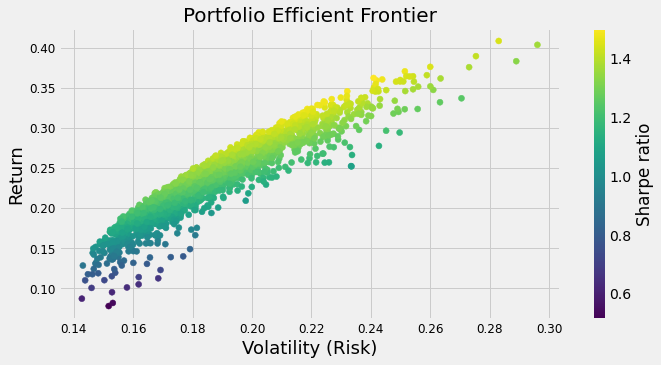

In [20]:
# visualization
#
plt.figure(figsize=(10,5))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns / portfolio_risks)

plt.title ('Portfolio Efficient Frontier', fontsize = 20)
plt.xlabel('Volatility (Risk)', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.colorbar(label = 'Sharpe ratio')

<h1>Optimize the portfolio using Differential Evolution (DE) algorithm</h1>
<p>This is be using scipy's differential_evolution() function.

In [21]:
from scipy.optimize import differential_evolution
import numpy as np

In [22]:
def objective_function(weights):

    # make sure they're summed to 100% (or 1.00)
    weights = np.round(weights / np.sum(weights), 5)
    
    # calculate annualized return
    annualized_return = np.sum(returns.mean() * weights) * 252

    # calculate annualized covariance matrix & portfolio risk
    cov_mat = returns.cov() * 252
    
    # calculate portfolio risk = SQRT (WT * Covariance_Matrix * W)
    port_var  = np.dot(weights.T, np.dot(cov_mat, weights))
    port_risk = np.sqrt(port_var)
    
    # Sharpe ratio
    sr = (annualized_return - RF) / port_risk

    return -annualized_return   # to maximize annualized_return
    #return port_risk           # to minimize port_risk
    #return -sr                 # to maximize sr (Sharpe ratio)

In [23]:
bounds = []
for i in range(len(tickers)):
    bounds.append([0, 1.0])
bounds

[[0, 1.0],
 [0, 1.0],
 [0, 1.0],
 [0, 1.0],
 [0, 1.0],
 [0, 1.0],
 [0, 1.0],
 [0, 1.0]]

In [24]:
# Perform optimization using DE with some parameter settings
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html
#

result = differential_evolution(objective_function, bounds, seed=123)
print(result)

# Reproportionate the weights to make their summation equal to 1.0
#
w = result.x
w = np.round(w / np.sum(w), 5)

# round to 4 decimal digits
weights = [round(e, 4) for e in w]

# combine weight and ticker into a final result dataframe
res = pd.DataFrame(tickers, columns=['ticker'])
res['weight'] = weights
res

     fun: -0.6620012494969565
 message: 'Optimization terminated successfully.'
    nfev: 11529
     nit: 95
 success: True
       x: array([9.55401933e-01, 6.45534225e-03, 2.93890717e-03, 1.24655372e-04,
       4.10338842e-04, 1.75510686e-03, 5.12693547e-04, 1.33427899e-03])


,ticker,weight
0,TSLA,0.9860
1,AAPL,0.0067
2,AMZN,0.0030
3,GOOG,0.0001
4,K,0.0004
5,SJM,0.0018
6,CPALL.BK,0.0005
7,PTT.BK,0.0014


In [25]:
# Recompute and report portfolio return, portfolio risk, and Sharpe ratio
#
def report_return_risk_sharpe(w):
    weights = np.round(w / np.sum(w), 5)

    # calculate annualized return
    annualized_return = np.sum(returns.mean() * weights) * 252
    print('Return =\t', round(annualized_return, 4))

    # calculate annualized covariance matrix & portfolio risk
    cov_mat = returns.cov() * 252

    # calculate portfolio risk = SQRT (WT * Covariance_Matrix * W)
    port_var  = np.dot(weights.T, np.dot(cov_mat, weights))
    port_risk = np.sqrt(port_var)

    print('Port risk =\t', round(port_risk, 4))

    # Sharpe ratio
    sr = (annualized_return - RF) / port_risk
    print('Sharpe ratio =\t', round(sr, 4))

In [26]:
report_return_risk_sharpe(weights)

Return =	 0.662
Port risk =	 0.5943
Sharpe ratio =	 1.0972


### Now, let's try tuning parameters of DE for better results

<p>Default parameters of DE are as following:

scipy.optimize.differential_evolution(func, bounds, args=(), strategy='best1bin', maxiter=1000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None)

In [27]:
#
# Warning: this will take several seconds or even a few minutes to complete running!
#
result = differential_evolution(objective_function, bounds, seed=123, 
                                maxiter=1500, popsize=30, recombination=0.85)
print(result)

# Reproportionate the weights to make their summation equal to 1.0
#
w = result.x
w = np.round(w / np.sum(w), 5)

# round to 4 decimal digits
weights = [round(e, 4) for e in w]
print('Now the weights are', weights, ', totalling', np.sum(weights))

# combine weight and ticker into a final result dataframe
res = pd.DataFrame(tickers, columns=['ticker'])
res['weight'] = weights
res

     fun: -0.6645048943590429
 message: 'Optimization terminated successfully.'
    nfev: 26409
     nit: 109
 success: True
       x: array([9.60558879e-01, 1.67272662e-04, 1.41748222e-03, 7.67433153e-04,
       4.39232596e-04, 1.32698653e-03, 1.04528886e-03, 4.45401494e-04])
Now the weights are [0.9942, 0.0002, 0.0015, 0.0008, 0.0004, 0.0014, 0.0011, 0.0005] , totalling 1.0001


,ticker,weight
0,TSLA,0.9942
1,AAPL,0.0002
2,AMZN,0.0015
3,GOOG,0.0008
4,K,0.0004
5,SJM,0.0014
6,CPALL.BK,0.0011
7,PTT.BK,0.0005


In [28]:
report_return_risk_sharpe(weights)

Return =	 0.6645
Port risk =	 0.5982
Sharpe ratio =	 1.0941


## Now try minimize portfolio risk

In [29]:
def minimize_port_risk(weights):

    # make sure they're summed to 100% (or 1.00)
    weights = np.round(weights / np.sum(weights), 5)
    
    # calculate annualized return
    annualized_return = np.sum(returns.mean() * weights) * 252

    # calculate annualized covariance matrix & portfolio risk
    cov_mat = returns.cov() * 252
    
    # calculate portfolio risk = SQRT (WT * Covariance_Matrix * W)
    port_var  = np.dot(weights.T, np.dot(cov_mat, weights))
    port_risk = np.sqrt(port_var)
    
    # Sharpe ratio
    sr = (annualized_return - RF) / port_risk

    #return -annualized_return  # to maximize annualized_return
    return port_risk            # to minimize port_risk
    #return -sr                 # to maximize sr (Sharpe ratio)

In [30]:
result = differential_evolution(minimize_port_risk, bounds, seed=123, 
                                maxiter=1500, popsize=30, recombination=0.85)
print(result)

# Reproportionate the weights to make their summation equal to 1.0
#
w = result.x
w = np.round(w / np.sum(w), 5)

# round to 4 decimal digits
weights = [round(e, 4) for e in w]
print('Now the weights are', weights, ', totalling', np.sum(weights))

# combine weight and ticker into a final result dataframe
res = pd.DataFrame(tickers, columns=['ticker'])
res['weight'] = weights
res

     fun: 0.1375749715357068
 message: 'Optimization terminated successfully.'
    nfev: 3849
     nit: 15
 success: True
       x: array([0.00422721, 0.03062257, 0.21973874, 0.27394392, 0.59669227,
       0.41465754, 0.99426137, 0.18130946])
Now the weights are [0.0016, 0.0113, 0.0809, 0.1009, 0.2197, 0.1527, 0.3661, 0.0668] , totalling 0.9999999999999999


,ticker,weight
0,TSLA,0.0016
1,AAPL,0.0113
2,AMZN,0.0809
3,GOOG,0.1009
4,K,0.2197
5,SJM,0.1527
6,CPALL.BK,0.3661
7,PTT.BK,0.0668


In [31]:
report_return_risk_sharpe(weights)

Return =	 0.0905
Port risk =	 0.1376
Sharpe ratio =	 0.5851


## Now try maximize Sharpe ratio

In [32]:
def maximize_sharpe_ratio(weights):

    # make sure they're summed to 100% (or 1.00)
    weights = np.round(weights / np.sum(weights), 5)
    
    # calculate annualized return
    annualized_return = np.sum(returns.mean() * weights) * 252

    # calculate annualized covariance matrix & portfolio risk
    cov_mat = returns.cov() * 252
    
    # calculate portfolio risk = SQRT (WT * Covariance_Matrix * W)
    port_var  = np.dot(weights.T, np.dot(cov_mat, weights))
    port_risk = np.sqrt(port_var)
    
    # Sharpe ratio
    sr = (annualized_return - RF) / port_risk

    #return -annualized_return  # to maximize annualized_return
    #return port_risk           # to minimize port_risk
    return -sr                 # to maximize sr (Sharpe ratio)

In [33]:
result = differential_evolution(maximize_sharpe_ratio, bounds, seed=123, 
                                maxiter=1500, popsize=30, recombination=0.85)
print(result)

# Reproportionate the weights to make their summation equal to 1.0
#
w = result.x
w = np.round(w / np.sum(w), 5)

# round to 4 decimal digits
weights = [round(e, 4) for e in w]
print('Now the weights are', weights, ', totalling', np.sum(weights))

# combine weight and ticker into a final result dataframe
res = pd.DataFrame(tickers, columns=['ticker'])
res['weight'] = weights
res

     fun: -1.4915647501397697
 message: 'Optimization terminated successfully.'
    nfev: 3369
     nit: 13
 success: True
       x: array([0.57115736, 0.75293385, 0.99950842, 0.53144731, 0.00843299,
       0.05007659, 0.04339691, 0.00930592])
Now the weights are [0.1926, 0.2538, 0.337, 0.1792, 0.0028, 0.0169, 0.0146, 0.0031] , totalling 1.0


,ticker,weight
0,TSLA,0.1926
1,AAPL,0.2538
2,AMZN,0.3370
3,GOOG,0.1792
4,K,0.0028
5,SJM,0.0169
6,CPALL.BK,0.0146
7,PTT.BK,0.0031


In [34]:
report_return_risk_sharpe(weights)

Return =	 0.4127
Port risk =	 0.27
Sharpe ratio =	 1.4916
